In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [2]:
data

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
data.drop(['index', 'day', 'month', 'year'],axis=1,inplace=True)

In [5]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [6]:
data['Classes']=data['Classes'].str.strip()
data['Classes'] = data['Classes'].map({'not fire': 1, 'fire': 0})

In [7]:
data['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [8]:
X=data.drop(['FWI'],axis=1)
y=data['FWI']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(182, 11)

<Axes: >

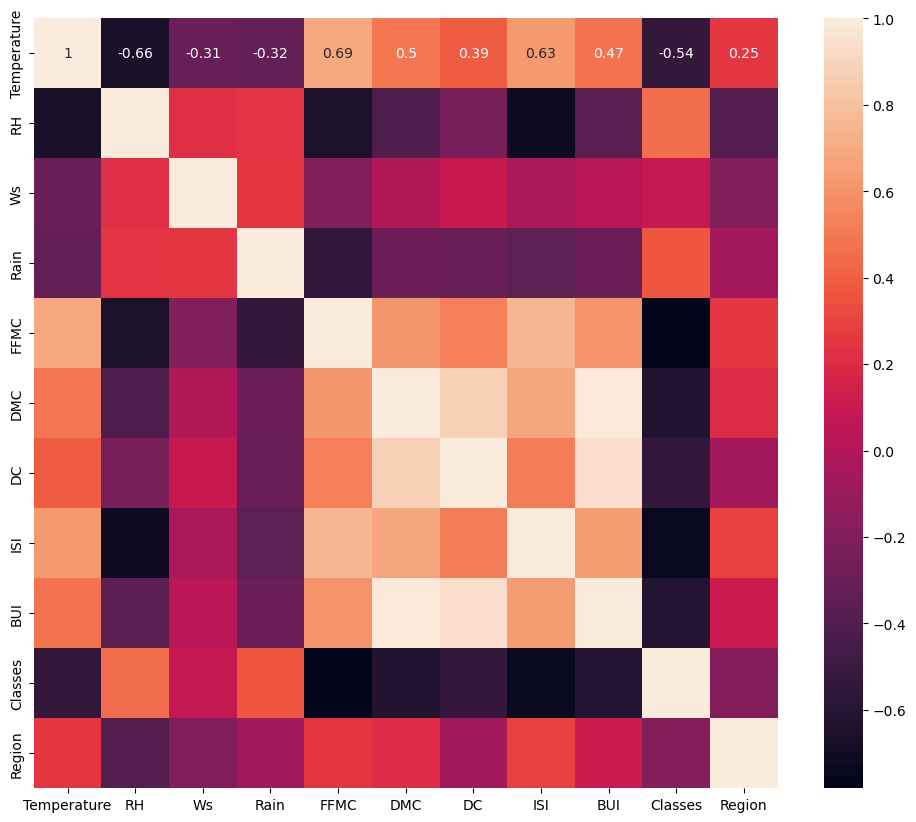

In [12]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [13]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


In [14]:
def find_high_correlation(data, threshold):
    # Compute the correlation matrix
    corr_matrix = data.corr()

    # Create an empty list to store the results
    high_corr_pairs = []

    # Loop through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the correlation is greater than the threshold and not 1 (self-correlation)
            if (corr_matrix.iloc[i, j]) > threshold:
                colname_1 = corr_matrix.columns[i]
                colname_2 = corr_matrix.columns[j]
                # Append the pair of columns and their correlation value
                high_corr_pairs.append((colname_1, colname_2, corr_matrix.iloc[i, j]))

    # Return the high correlation pairs
    return high_corr_pairs



In [15]:
high_corr_columns = find_high_correlation(x_train, 0.85)

# Print the results
if high_corr_columns:
    print("Columns with correlation greater than 0.85:")
    for col1, col2, corr_value in high_corr_columns:
        print(f"{col1} and {col2}: {corr_value:.2f}")
else:
    print("No correlations greater than 0.85 found.")

Columns with correlation greater than 0.85:
DC and DMC: 0.87
BUI and DMC: 0.98
BUI and DC: 0.94


In [16]:
# Example usage:
high_corr_columns = find_high_correlation(x_test, 0.85)

# Print the results
if high_corr_columns:
    print("Columns with correlation greater than 0.85 :")
    for col1, col2, corr_value in high_corr_columns:
        print(f"{col1} and {col2}: {corr_value:.2f}")
else:
    print("No correlations greater than 0.85 found.")

Columns with correlation greater than 0.85 :
DC and DMC: 0.90
BUI and DMC: 0.98
BUI and DC: 0.94


In [17]:
x_train=x_train.drop(['BUI','DC'],axis=1)
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,1,0
141,31,72,14,0.2,60.2,3.8,0.8,1,1
192,40,31,15,0.0,94.2,22.5,16.6,0,1
68,32,60,18,0.3,77.1,11.3,2.2,1,0
119,32,47,14,0.7,77.5,7.1,1.8,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,1,0
14,28,80,17,3.1,49.4,3.0,0.4,1,0
92,25,76,17,7.2,46.0,1.3,0.2,1,0
179,34,59,16,0.0,88.1,19.5,7.4,0,1


In [18]:
x_test=x_test.drop(['BUI','DC'],axis=1)
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,0,0
6,33,54,13,0.0,88.2,9.9,6.4,0,0
152,28,58,18,2.2,63.7,3.2,1.2,1,1
232,34,58,13,0.2,79.5,18.7,2.1,1,1
238,30,65,14,0.0,85.4,16.0,4.5,0,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,1,1
178,33,57,16,0.0,87.5,15.7,6.7,0,1
224,31,72,14,0.0,84.2,8.3,3.8,0,1
230,36,33,13,0.1,90.6,25.8,9.0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
        -0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
        -0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         1.10431526, -0.98907071]])

In [21]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01, -9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01, -9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01,  1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01,  1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02, -9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'x_train after scalling')

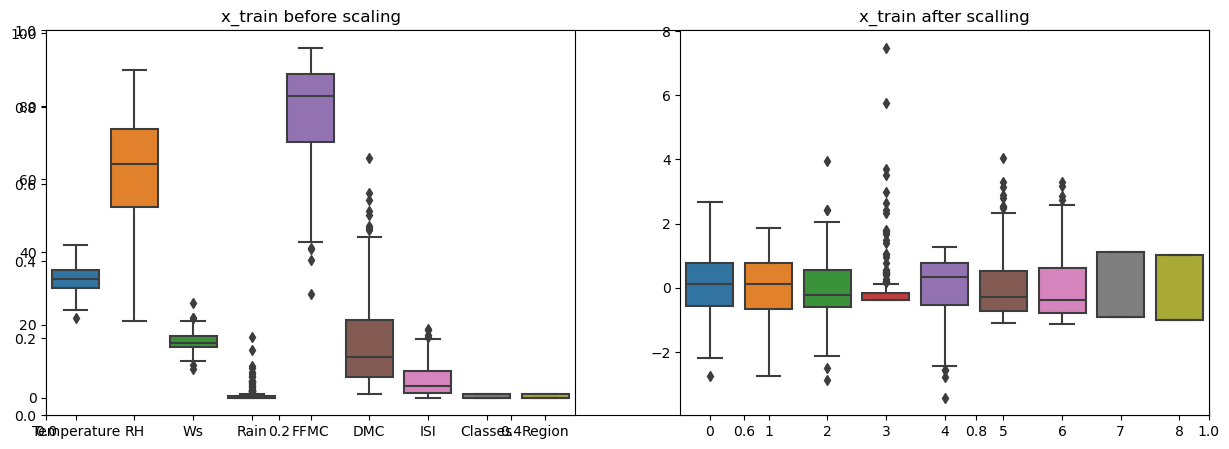

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scalling')

models

mean_absolute_error 0.5468236465249983
R2_score 0.9847657384266951


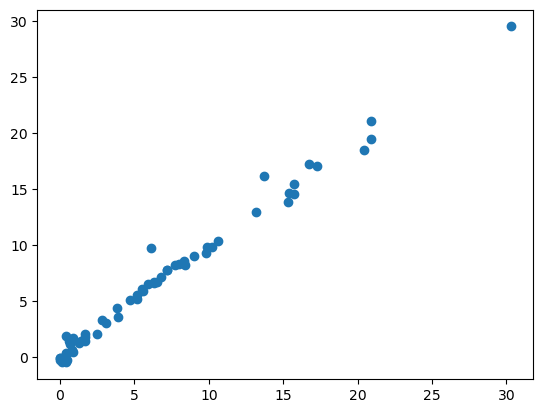

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

## Lasso regressionmodel

mean_absolute_error 1.1331759949144087
R2_score 0.9492020263112388


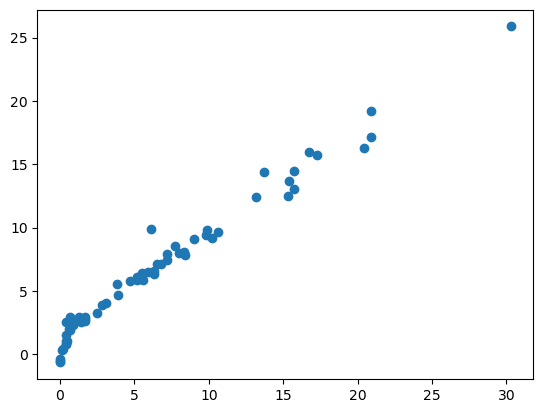

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
linreg=Lasso()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.6199701158263433
R2_score 0.9820946715928275


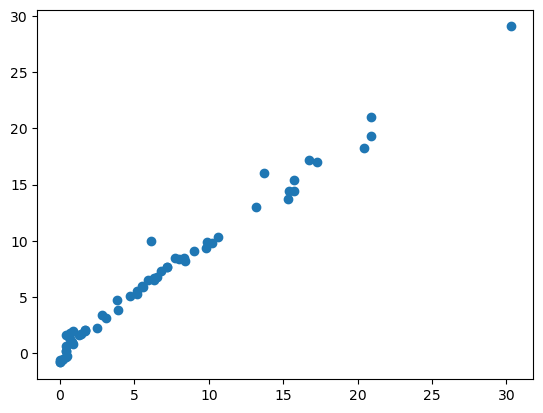

In [25]:
from sklearn.linear_model import LassoCV
linreg=LassoCV(cv=5)
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

In [26]:
linreg.alpha_

0.05725391318234411

In [27]:
linreg.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [28]:
linreg.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

## ridge regression

mean_absolute_error 0.5642305340105684
R2_score 0.9842993364555513


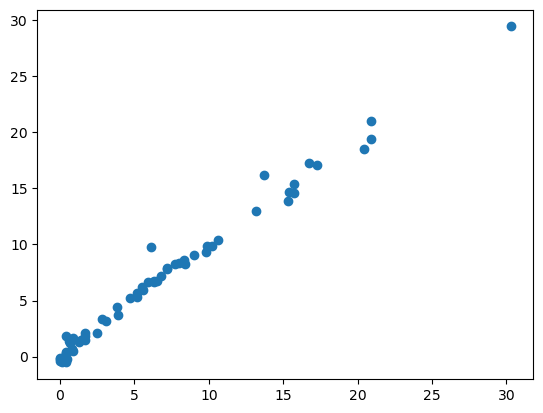

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridgereg=Ridge()
ridgereg.fit(x_train_scaled,y_train)
y_pred=ridgereg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.5642305340105684
R2_score 0.9842993364555513


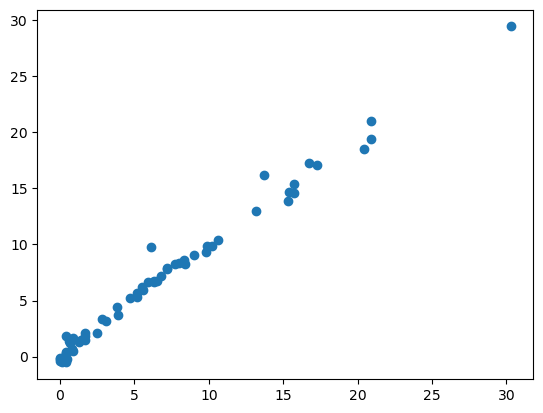

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
linreg=RidgeCV(cv=5)
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

In [31]:
linreg.alpha_

1.0

##ElasticNet

mean_absolute_error 1.8822353634895999
R2_score 0.8753460589519704


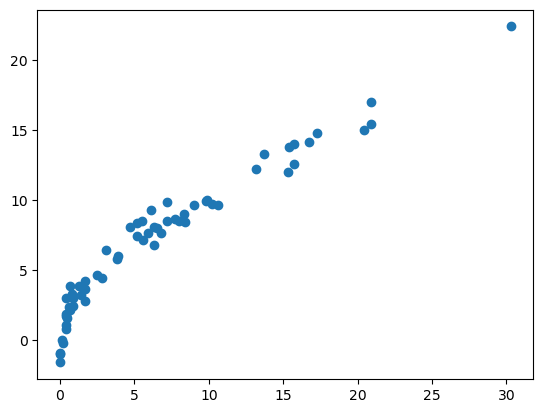

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
linreg=ElasticNet()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.6575946731430904
R2_score 0.9814217587854941


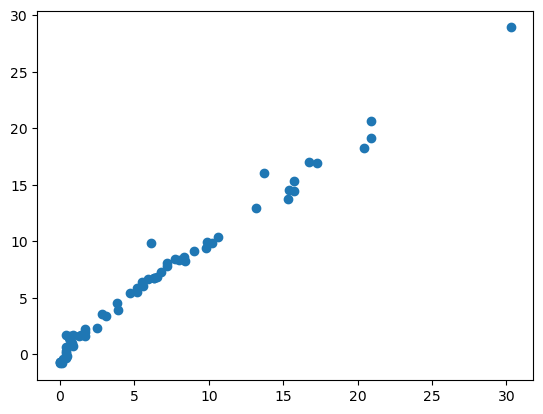

In [33]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
linreg=ElasticNetCV()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2_score",scores)
plt.scatter(y_test,y_pred)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridgereg.pkl','wb'))

In [ ]:
model=pickle.load(open('linreg.pkl','rb'))